In [2]:
import numpy as np

def metropolis_hastings(target_density, N, initial_state, proposal_width):
    """
    Metropolis-Hastings algorithm with uniform proposal distribution.

    Parameters:
        target_density (function): The target density function to sample from.
        N (int): Number of samples to generate.
        initial_state (float): Initial state of the Markov chain.
        proposal_width (float): Width of the uniform proposal distribution.

    Returns:
        chain (list): Generated Markov chain.
        avg_acceptance_rate (float): Average acceptance rate.
    """
    chain = [initial_state]
    accepted = 0

    for _ in range(N - 1):
        current_state = chain[-1]
        proposal = current_state + np.random.uniform(-proposal_width, proposal_width)
        
        # Calculate acceptance probability
        acceptance_prob = min(1, target_density(proposal) / target_density(current_state))
        
        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            chain.append(proposal)
            accepted += 1
        else:
            chain.append(current_state)

    avg_acceptance_rate = accepted / N
    return chain, avg_acceptance_rate

In [3]:
import matplotlib.pyplot as plt

# Define the target density function
def target_density(x):
    return np.exp(-x**2 / 2)

# Parameters
N = 10000
initial_state = 0
proposal_widths = np.linspace(0.1, 30.0, 400)
acceptance_rates = []

# Run Metropolis-Hastings for different proposal widths
for width in proposal_widths:
    _, avg_acceptance_rate = metropolis_hastings(target_density, N, initial_state, width)
    acceptance_rates.append(avg_acceptance_rate)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


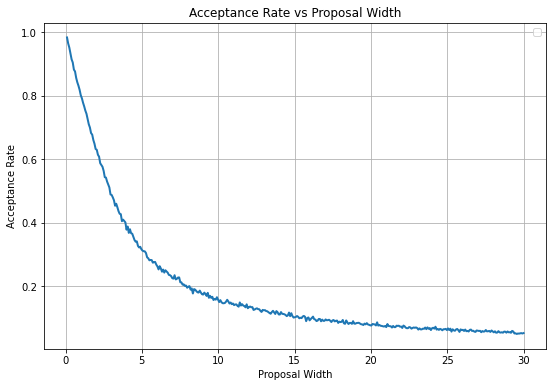

In [4]:
# Plot the results with a thicker line
plt.figure(figsize=(9, 6))
plt.plot(proposal_widths, acceptance_rates, linewidth=2)
plt.xlabel('Proposal Width')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs Proposal Width')
plt.grid()
plt.legend()
plt.savefig("Plots/accept_vs_step.pdf")

plt.show()

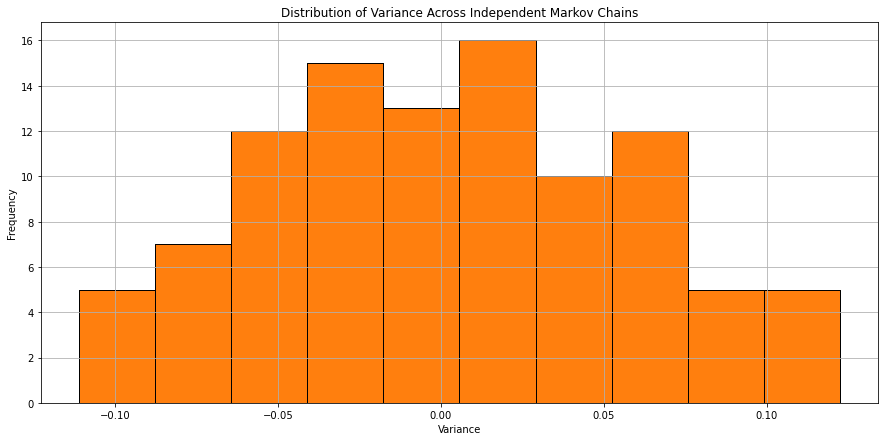

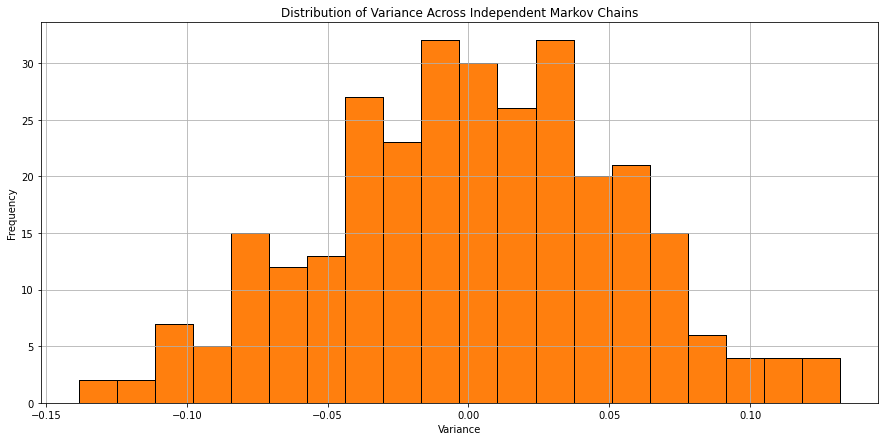

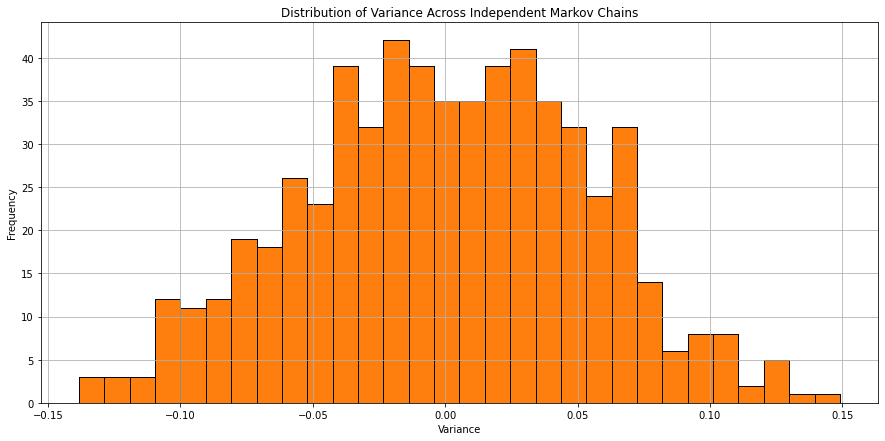

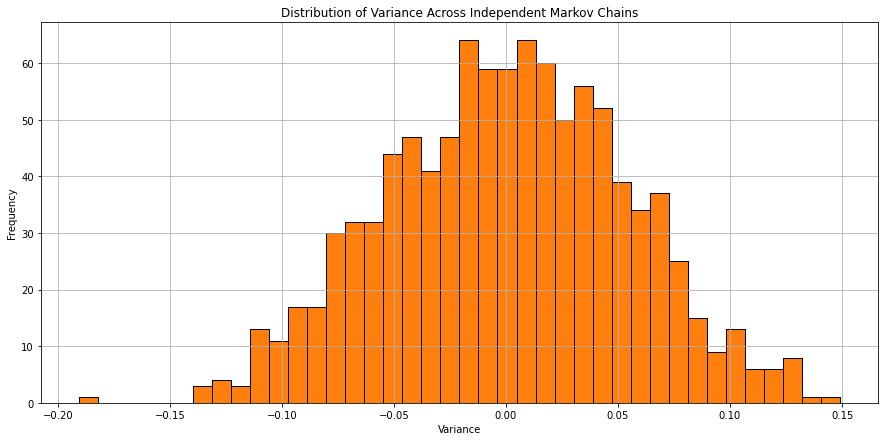

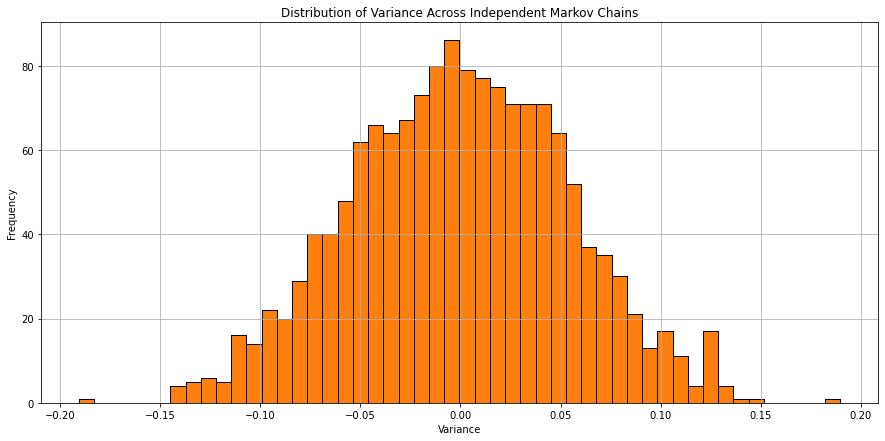

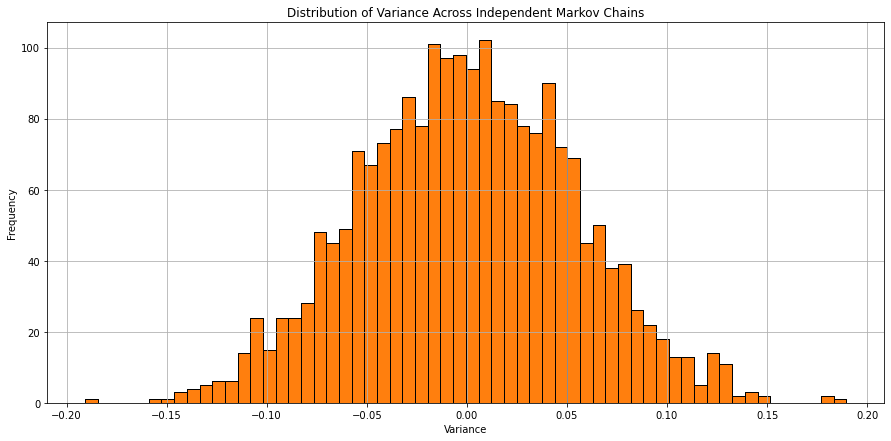

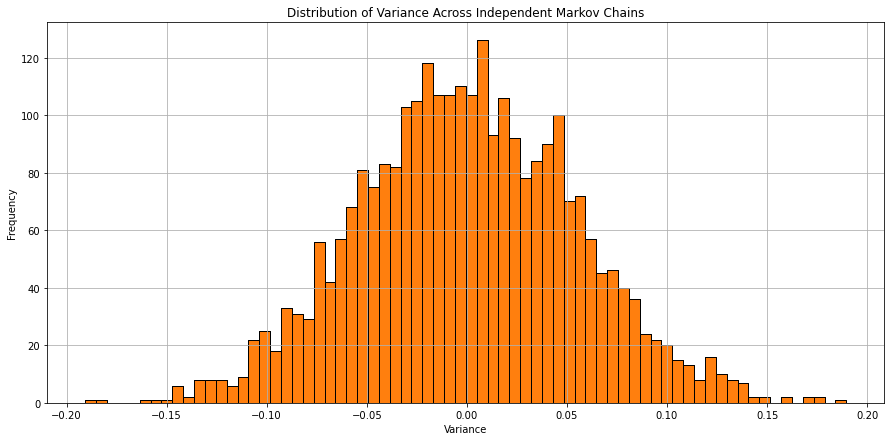

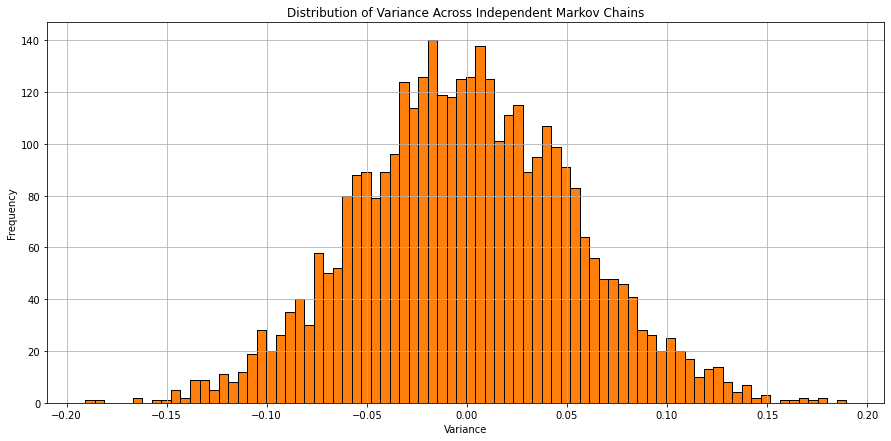

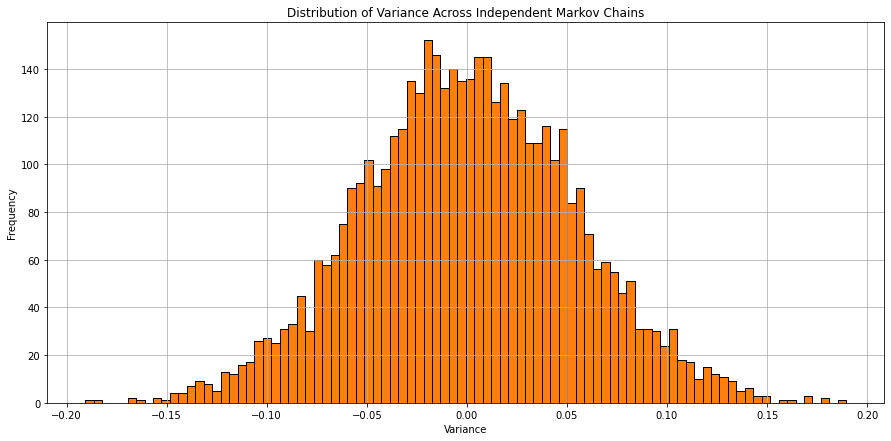

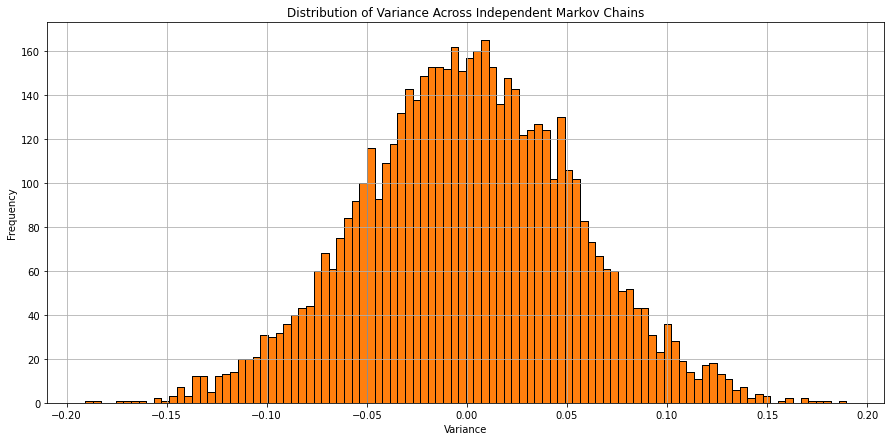

In [5]:
# Generate 50 independent Markov chains and calculate their variances
independent_variances = []
for i in range(1,11):
    for _ in range(100 * i):
        chain, _ = metropolis_hastings(target_density, N, initial_state, width)
        independent_variances.append(np.mean(chain))

    # Normalize the histogram to create a PMF
    plt.figure(figsize=(15, 7))
    plt.hist(independent_variances, bins=(10 * i), edgecolor='black')
    # Plot the distribution of variances in a histogram
    plt.hist(independent_variances, bins=( 10 * i ), edgecolor='black')
    plt.xlabel('Variance')
    plt.ylabel('Frequency')
    plt.title('Distribution of Variance Across Independent Markov Chains')
    plt.grid()
    plt.show()